In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading CSV File


from google.colab import files

uploaded = files.upload()


Saving SupermartGrocerySales.csv to SupermartGrocerySales.csv


In [ ]:
# Importing csv file

import io

df = pd.read_csv(io.BytesIO(uploaded['SupermartGrocerySales.csv']))
print(df)


     Order ID Customer Name           Category      Sub Category         City  \
0         OD1        Harish       Oil & Masala           Masalas      Vellore   
1         OD2         Sudha          Beverages     Health Drinks  Krishnagiri   
2         OD3       Hussain        Food Grains      Atta & Flour   Perambalur   
3         OD4       Jackson   Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4         OD5       Ridhesh        Food Grains   Organic Staples         Ooty   
...       ...           ...                ...               ...          ...   
9989   OD9990        Sudeep  Eggs, Meat & Fish              Eggs      Madurai   
9990   OD9991          Alan             Bakery          Biscuits  Kanyakumari   
9991   OD9992          Ravi        Food Grains              Rice         Bodi   
9992   OD9993          Peer       Oil & Masala            Spices   Pudukottai   
9993   OD9994        Ganesh        Food Grains      Atta & Flour  Tirunelveli   

      Order Date Region  Sa

In [ ]:
df.sample(3)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
1024,OD1025,Willams,Bakery,Biscuits,Tirunelveli,9/27/2016,Central,1703,0.26,681.20,Tamil Nadu
4636,OD4637,Aditi,Snacks,Cookies,Virudhunagar,12/14/2016,West,1932,0.21,656.88,Tamil Nadu
5538,OD5539,Verma,"Eggs, Meat & Fish",Fish,Tirunelveli,11-12-2017,West,2159,0.21,194.31,Tamil Nadu


In [ ]:
# Statistical summary of the dataset

df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [ ]:
# Dropping some of columns

df.drop(["Order ID"], axis=1, inplace=True)

In [ ]:
# Info of the DataFrame

df.info() # There are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer Name  9994 non-null   object 
 1   Category       9994 non-null   object 
 2   Sub Category   9994 non-null   object 
 3   City           9994 non-null   object 
 4   Order Date     9994 non-null   object 
 5   Region         9994 non-null   object 
 6   Sales          9994 non-null   int64  
 7   Discount       9994 non-null   float64
 8   Profit         9994 non-null   float64
 9   State          9994 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 780.9+ KB


In [ ]:
# Sample Data from Order Date Column

df["Order Date"].sample(10) # Order Date has different (mixed) formats


,Order Date
6609,5/20/2015
1332,6/30/2017
5996,4/30/2016
7820,9/15/2017
6512,12-11-2017
4880,4/18/2016
6169,7/21/2015
4824,7/23/2017
6077,4/20/2016
8070,6/25/2015


In [ ]:
# Converting Order Date Column to Pandas DateTime Format
# by using (format="mixed")

df["Order Date"] = pd.to_datetime(df["Order Date"], format="mixed")

In [ ]:
# Sample Data from Order Date Column after transformation

df["Order Date"].sample(10)

,Order Date
6184,2016-04-26
9552,2016-01-23
4960,2018-03-16
2236,2017-07-24
9800,2018-12-10
1211,2015-02-11
4174,2015-09-30
7572,2018-03-10
558,2017-06-10
7532,2016-06-08


In [ ]:
# Extracting Year from Order Date Column

df["Year"] = df["Order Date"].dt.year

# Extracting Month from Order Date Column

df["Month"] = df["Order Date"].dt.month_name()

# Extracting Date from Order Date Column

df["Date"] = df["Order Date"].dt.day

In [ ]:
# Creating a column with a weekday

# df["Weekday"] = pd.to_datetime(df[["Year", "Month", "Date"]]).dt.day_name()

df["Weekday"] = df["Order Date"].dt.day_name()

In [ ]:
# Dropping "Order Date" column

df.drop(["Order Date"], axis=1, inplace=True)

In [ ]:
# Final DataFrame

df.head(3)

,Customer Name,Category,Sub Category,City,Region,Sales,Discount,Profit,State,Year,Month,Date,Weekday
0,Harish,Oil & Masala,Masalas,Vellore,North,1254,0.12,401.28,Tamil Nadu,2017,November,8,Wednesday
1,Sudha,Beverages,Health Drinks,Krishnagiri,South,749,0.18,149.80,Tamil Nadu,2017,November,8,Wednesday
2,Hussain,Food Grains,Atta & Flour,Perambalur,West,2360,0.21,165.20,Tamil Nadu,2017,June,12,Monday


In [ ]:
# Unique values in Category Column

df["Category"].unique()

array(['Oil & Masala', 'Beverages', 'Food Grains', 'Fruits & Veggies',
       'Bakery', 'Snacks', 'Eggs, Meat & Fish'], dtype=object)

In [ ]:
# Unique values in Sub Category Column

df["Sub Category"].unique()

array(['Masalas', 'Health Drinks', 'Atta & Flour', 'Fresh Vegetables',
       'Organic Staples', 'Fresh Fruits', 'Biscuits', 'Cakes',
       'Chocolates', 'Eggs', 'Cookies', 'Chicken', 'Edible Oil & Ghee',
       'Mutton', 'Soft Drinks', 'Dals & Pulses', 'Organic Vegetables',
       'Noodles', 'Organic Fruits', 'Fish', 'Spices', 'Rice',
       'Breads & Buns'], dtype=object)

In [ ]:
# Categories and their associated Sub Categories

subcategories_by_category = df.groupby('Category')['Sub Category'].unique()

for category, subcategories in subcategories_by_category.items():
    print(f"{category}: {list(subcategories)}")
    print()

Bakery: ['Biscuits', 'Cakes', 'Breads & Buns']

Beverages: ['Health Drinks', 'Soft Drinks']

Eggs, Meat & Fish: ['Eggs', 'Chicken', 'Mutton', 'Fish']

Food Grains: ['Atta & Flour', 'Organic Staples', 'Dals & Pulses', 'Rice']

Fruits & Veggies: ['Fresh Vegetables', 'Fresh Fruits', 'Organic Vegetables', 'Organic Fruits']

Oil & Masala: ['Masalas', 'Edible Oil & Ghee', 'Spices']

Snacks: ['Chocolates', 'Cookies', 'Noodles']



In [ ]:
# Amount of products sold in each Category

#count = df["Category"].value_counts()
#print(count)

df["Category"].value_counts()

,count
Category,
Snacks,1514
"Eggs, Meat & Fish",1490
Fruits & Veggies,1418
Bakery,1413
Beverages,1400
Food Grains,1398
Oil & Masala,1361


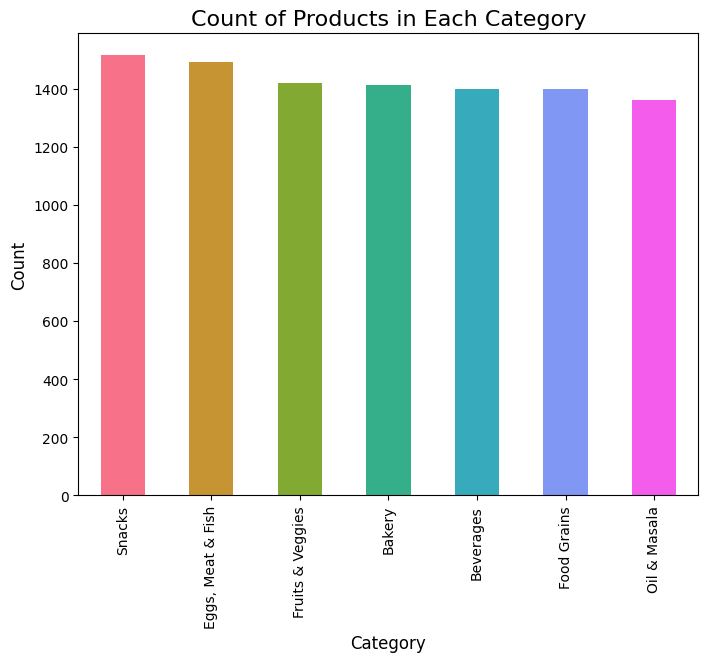

In [ ]:
# Creating a diagram for Category

category_counts = df["Category"].value_counts()

colors = sns.color_palette("husl", len(category_counts))

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color=colors)

plt.title('Count of Products in Each Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()


In [ ]:
# Amount of products sold in each Sub Category

#count = df["Sub Category"].value_counts()
#print(count)

df["Sub Category"].value_counts()

,count
Sub Category,
Health Drinks,719
Soft Drinks,681
Cookies,520
Breads & Buns,502
Chocolates,499
Noodles,495
Masalas,463
Biscuits,459
Cakes,452


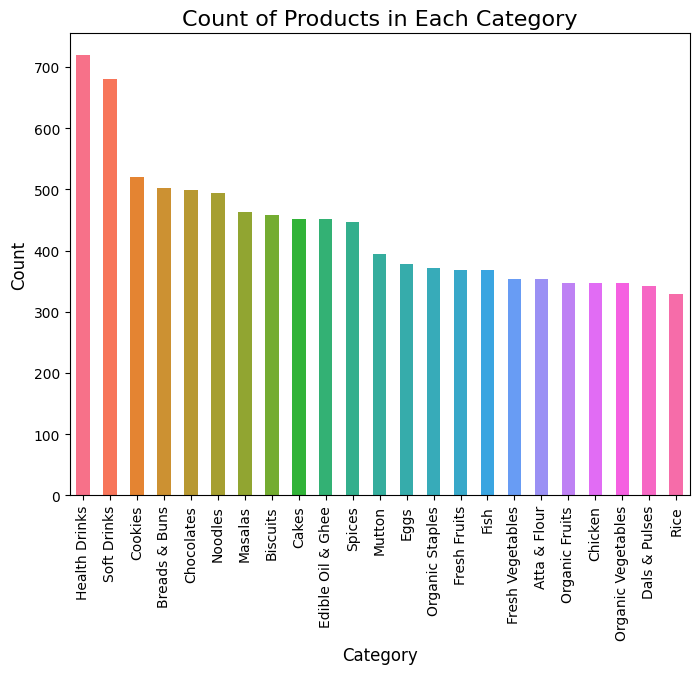

In [ ]:
# Creating a diagram for Sub Category

category_counts = df["Sub Category"].value_counts()
colors = sns.color_palette("husl", len(category_counts))


plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color=colors)

plt.title('Count of Products in Each Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [ ]:
# Count of products sold each Year

df["Year"].value_counts().sort_index()

,count
Year,
2015,1993
2016,2102
2017,2587
2018,3312


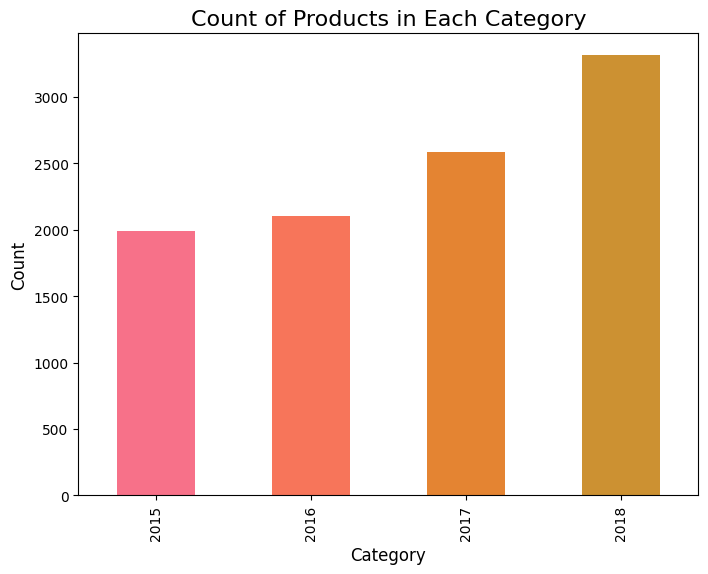

In [24]:
# Creating a diagram for products sold each Year

category_counts = df["Year"].value_counts()
category_counts = category_counts.sort_index()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color=colors)

plt.title('Count of Products in Each Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [25]:
# Count of products sold each Month

# Creating first a list with Month of the year in correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
               'September', 'October', 'November', 'December']

sales_count_by_month = df['Month'].value_counts().reindex(month_order, fill_value=0)

print(sales_count_by_month)

Month
January       381
February      300
March         696
April         668
May           735
June          717
July          710
August        706
September    1383
October       819
November     1471
December     1408
Name: count, dtype: int64


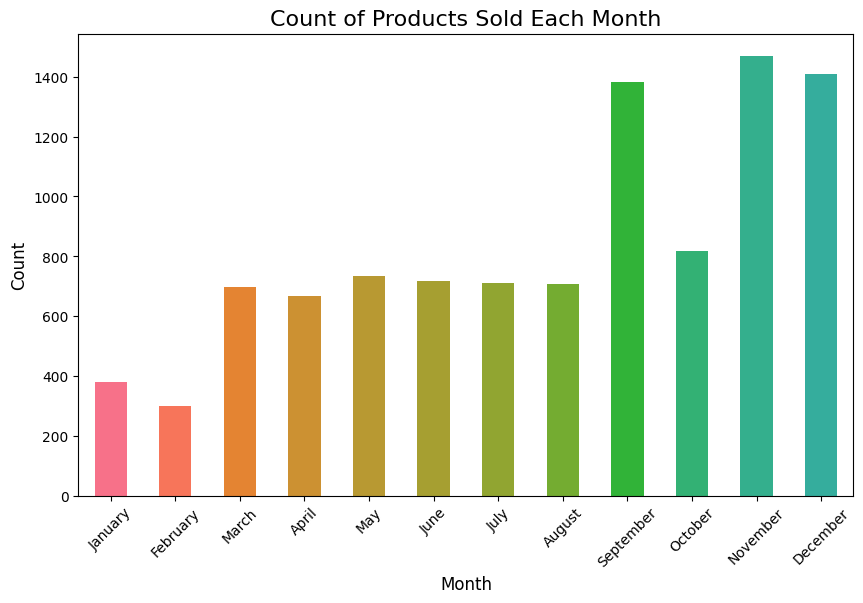

In [29]:
# Creating a diagram for products sold each Month (in correct order)

plt.figure(figsize=(10, 6))
sales_count_by_month.plot(kind='bar', color=colors)

plt.title('Count of Products Sold Each Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)
plt.show()

In [33]:
# Count of products sold each day in a week
category_counts = df["Weekday"].value_counts()

# Creating a list with weekdays in correct order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reordering the counts to match the correct weekday order
category_counts = category_counts.reindex(weekday_order, fill_value=0)

print(category_counts)

Weekday
Monday       1628
Tuesday      1933
Wednesday    1261
Thursday      544
Friday       1091
Saturday     1813
Sunday       1724
Name: count, dtype: int64


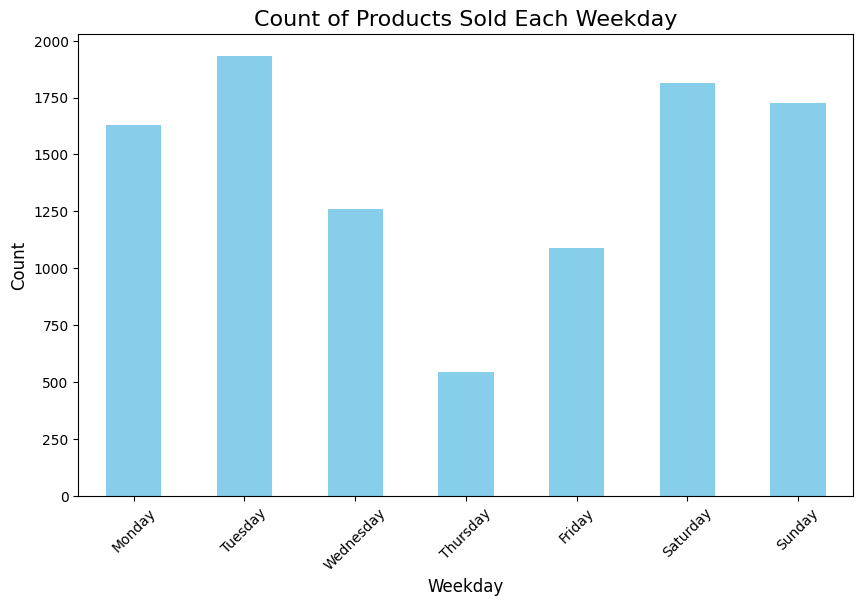

In [35]:
# Creating a diagram for products sold each day of the week (in correct order)

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')

plt.title('Count of Products Sold Each Weekday', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)
plt.show()

In [36]:
# Arranging products sold each Date by Date and counting them

date_counts = df["Date"].value_counts().sort_index()

print(date_counts)

Date
1     337
2     379
3     365
4     308
5     366
6     285
7     298
8     356
9     344
10    300
11    359
12    345
13    338
14    348
15    271
16    269
17    352
18    328
19    335
20    398
21    396
22    284
23    358
24    302
25    334
26    365
27    273
28    285
29    238
30    295
31    183
Name: count, dtype: int64


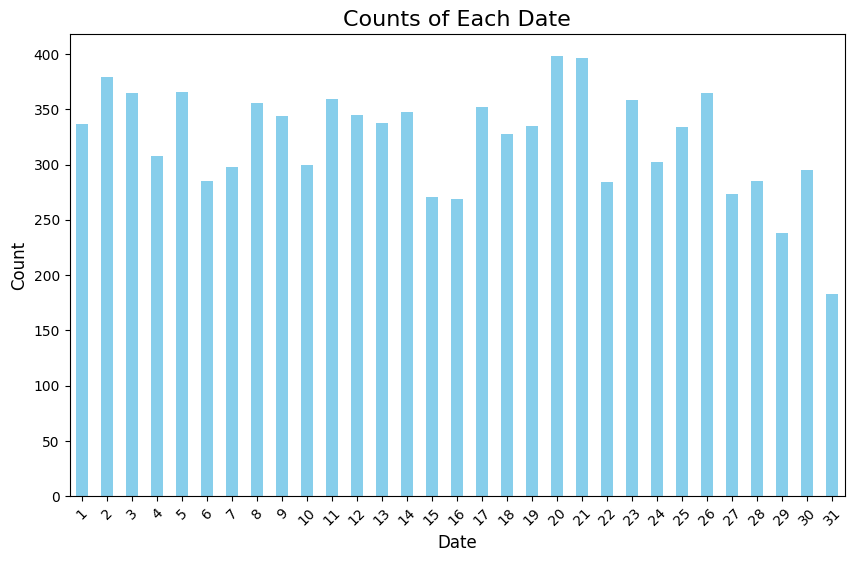

In [37]:
# Creating a diagram for products sold each day of 12-month period (in correct order)

plt.figure(figsize=(10, 6))
date_counts.plot(kind='bar', color='skyblue')

plt.title('Counts of Each Date', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)
plt.show()

In [38]:
# Total sale in each Category

df.groupby(["Category"])["Sales"].sum().sort_values(ascending=False)

,Sales
Category,
"Eggs, Meat & Fish",2267401
Snacks,2237546
Food Grains,2115272
Bakery,2112281
Fruits & Veggies,2100727
Beverages,2085313
Oil & Masala,2038442


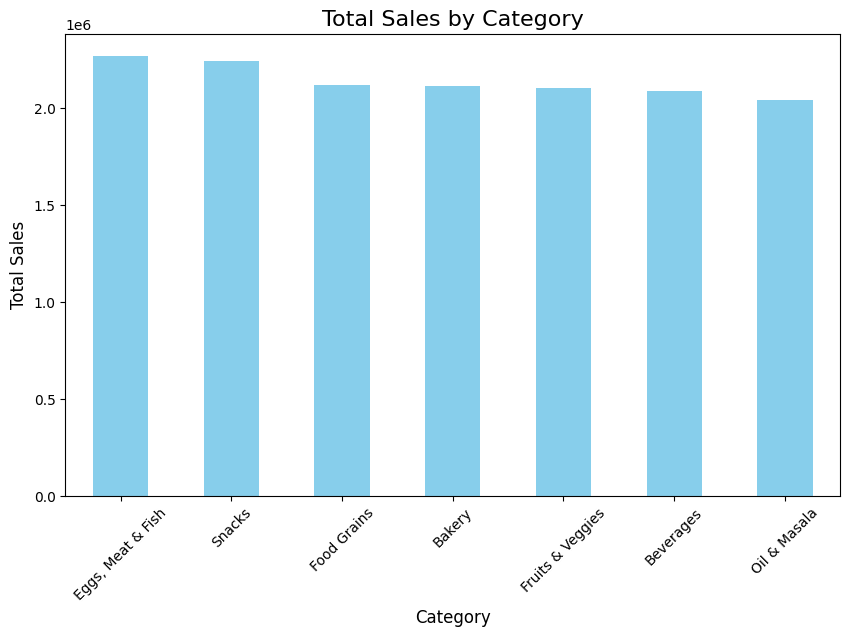

In [39]:
# Creating a diagram for Total sale in each Category

sales_by_category = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sales_by_category.plot(kind='bar', color='skyblue')

plt.title('Total Sales by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.xticks(rotation=45)
plt.show()

In [40]:
# Total sale in each Sub Category

df.groupby(["Sub Category"])["Sales"].sum().sort_values(ascending=False)

,Sales
Sub Category,
Health Drinks,1051439
Soft Drinks,1033874
Cookies,768213
Breads & Buns,742586
Noodles,735435
Chocolates,733898
Masalas,697480
Cakes,685612
Biscuits,684083


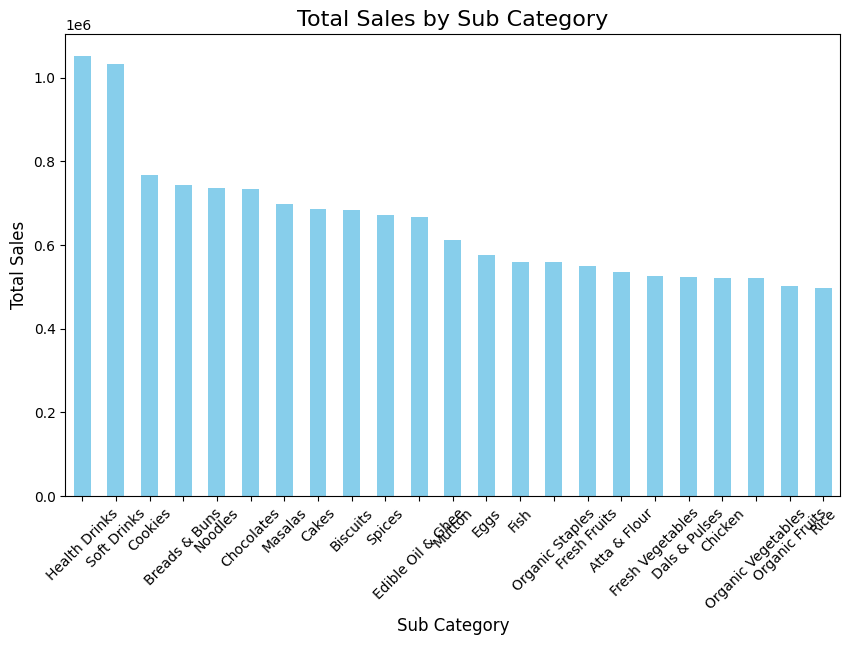

In [41]:
# Creating a diagram for Total sale in each Sub Category

sales_by_sub_category = df.groupby("Sub Category")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sales_by_sub_category.plot(kind='bar', color='skyblue')

plt.title('Total Sales by Sub Category', fontsize=16)
plt.xlabel('Sub Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.xticks(rotation=45)
plt.show()

In [42]:
# Total sale in each Month on correct month-order

sales_by_month = df.groupby("Month")["Sales"].sum()

sales_by_month = sales_by_month.reindex(month_order)

print(sales_by_month)

Month
January       577972
February      456102
March        1053980
April         998453
May          1086920
June         1057808
July         1089385
August       1046807
September    2064266
October      1243289
November     2193924
December     2088076
Name: Sales, dtype: int64


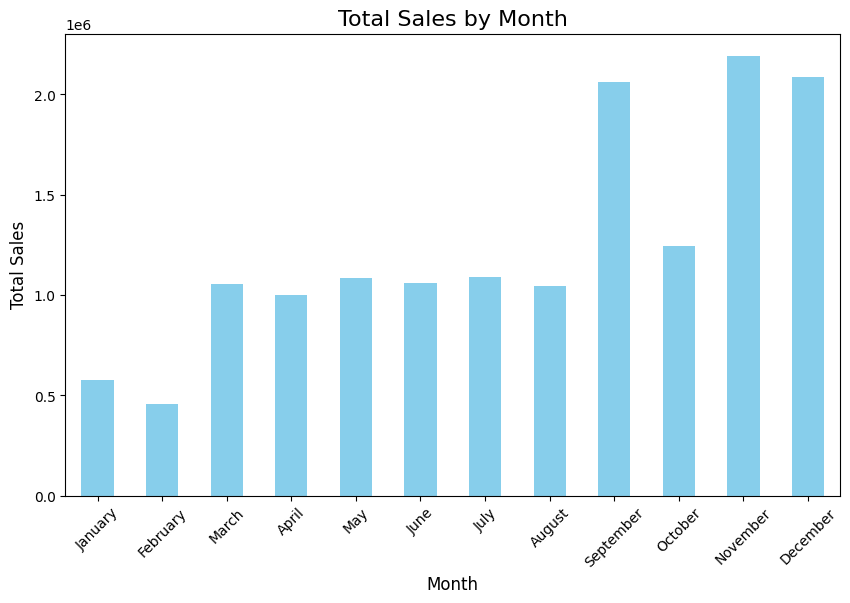

In [43]:
# Creating a diagram for Total sale for each month

plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='bar', color='skyblue')

plt.title('Total Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.xticks(rotation=45)

plt.show()


In [44]:
# Total sale in each Year

sales_by_year = df.groupby("Year")["Sales"].sum()

sales_by_year = sales_by_year.sort_index()

print(sales_by_year)

Year
2015    2975599
2016    3131959
2017    3871912
2018    4977512
Name: Sales, dtype: int64


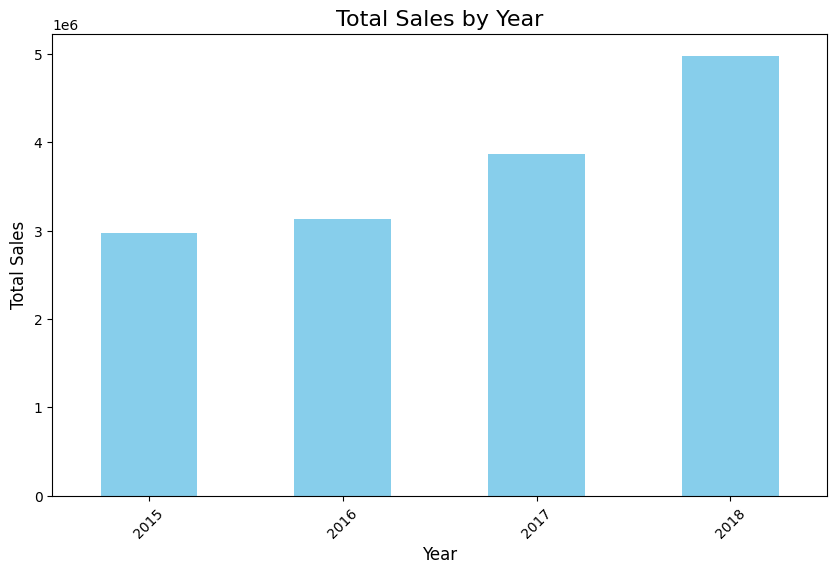

In [45]:
# Creating a diagram for Total sale in each year

plt.figure(figsize=(10, 6))
sales_by_year.plot(kind='bar', color='skyblue')

plt.title('Total Sales by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.xticks(rotation=45)

plt.show()

In [46]:
# Profit by Category

profit_by_category = df.groupby(["Category"])["Profit"].sum().sort_values(ascending=False)

print(profit_by_category)

Category
Snacks               568178.85
Eggs, Meat & Fish    567357.22
Fruits & Veggies     530400.38
Food Grains          529162.64
Bakery               528521.06
Beverages            525605.76
Oil & Masala         497895.29
Name: Profit, dtype: float64


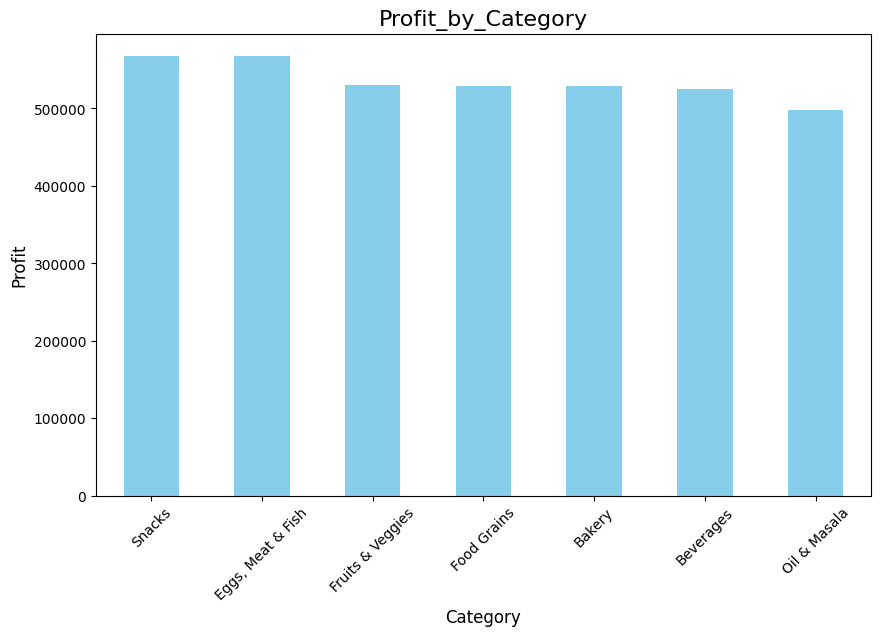

In [62]:
# Creating a diagram for Profit by Category

plt.figure(figsize=(10, 6))
profit_by_category.plot(kind='bar', color='skyblue')

plt.title('Profit_by_Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Profit', fontsize=12)

plt.xticks(rotation=45)

plt.show()

In [52]:
# Profit per Year

profit_per_year = df.groupby('Year')['Profit'].sum()
print("Profit per Year:\n", profit_per_year)

Profit per Year:
 Year
2015     752529.11
2016     797192.99
2017     953216.22
2018    1244182.88
Name: Profit, dtype: float64


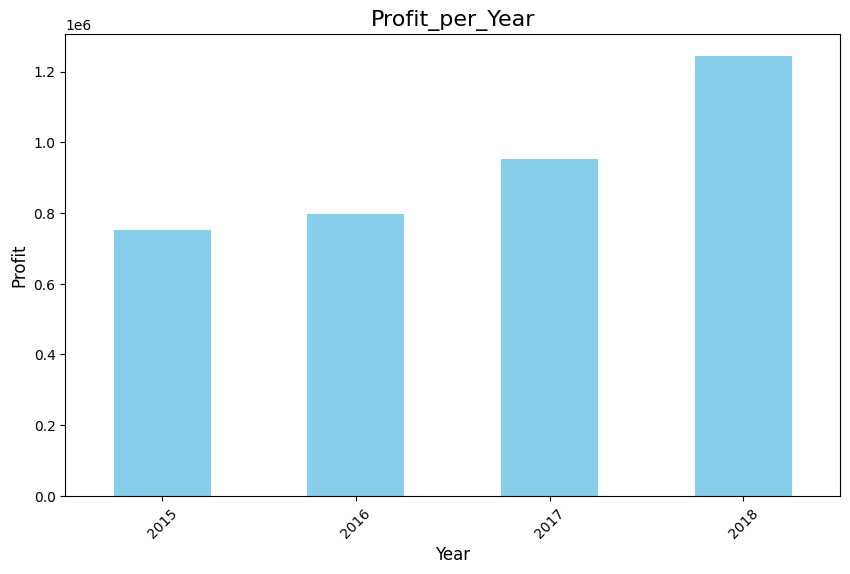

In [75]:
# Creating a diagram for Profit per Year

plt.figure(figsize=(10, 6))
profit_per_year.plot(kind='bar', color='skyblue')

plt.title('Profit_per_Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Profit', fontsize=12)

plt.xticks(rotation=45)

plt.show()

In [70]:
# Profit per Year and Month

profit_per_month_year = df.groupby(['Year', 'Month'])['Profit'].sum()
profit_per_month_year = profit_per_month.unstack().reindex(columns=month_order).stack()
print("\nProfit per Month:\n", profit_per_month)


Profit per Month:
 Year  Month    
2015  January       32594.50
      February      18125.94
      March         66572.78
      April         51679.95
      May           37879.04
      June          51360.52
      July          53604.46
      August        54424.99
      September     95193.28
      October       63465.04
      November     124528.77
      December     103099.84
2016  January       20487.32
      February      24115.62
      March         58060.58
      April         59001.65
      May           56158.91
      June          54424.72
      July          56951.80
      August        58561.35
      September    108852.15
      October       61509.91
      November     121308.72
      December     117760.26
2017  January       29008.80
      February      32683.32
      March         59920.01
      April         59817.03
      May           80991.20
      June          69709.74
      July          77383.36
      August        66637.41
      September    137044.30
      O

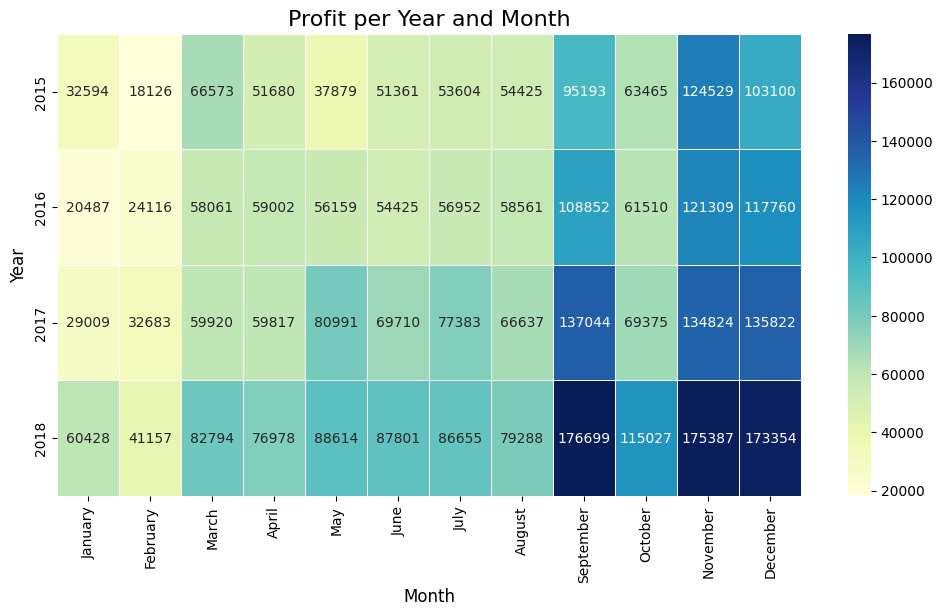

In [74]:
# Creating a diagram for Profit per Year and Month


profit_per_month_year = df.groupby(['Year', 'Month'])['Profit'].sum().reset_index()

profit_per_month_year_pivot = profit_per_month_year.pivot(index='Year', columns='Month', values='Profit').reindex(columns=month_order, fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(profit_per_month_year_pivot, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)

plt.title('Profit per Year and Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year', fontsize=12)

plt.show()

In [56]:
# Profit per day (for all four years)

profit_per_day = df.groupby(['Date'])['Profit'].sum()
pd.set_option('display.max_rows', None)
print("\nProfit per Day:\n", profit_per_day)
pd.reset_option('display.max_rows')


Profit per Day:
 Date
1     127293.79
2     146639.29
3     143589.02
4     110280.57
5     140652.63
6     101544.64
7     109596.43
8     128538.01
9     133809.13
10    108711.34
11    129368.93
12    123035.25
13    121431.66
14    129892.14
15    102997.95
16    108658.32
17    125678.07
18    123065.36
19    125043.79
20    147149.51
21    152571.41
22    104482.21
23    135354.63
24    112206.14
25    127463.30
26    130800.25
27    105731.07
28    109877.45
29    103025.81
30    108047.43
31     70585.67
Name: Profit, dtype: float64


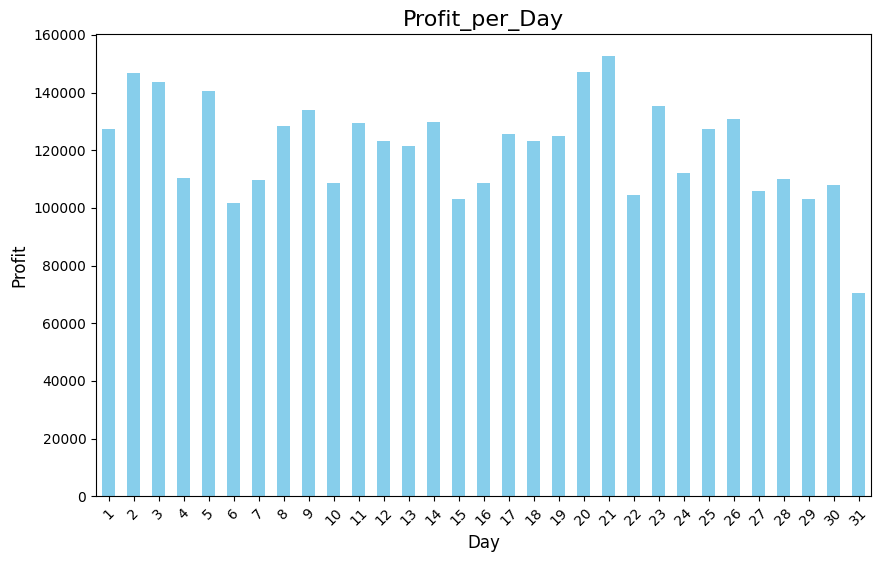

In [76]:
# Creating a diagram for Profit per day (for all four years)

plt.figure(figsize=(10, 6))
profit_per_day.plot(kind='bar', color='skyblue')

plt.title('Profit_per_Day', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Profit', fontsize=12)

plt.xticks(rotation=45)

plt.show()

Correlation between Sales och Profit: 0.6053485582321633


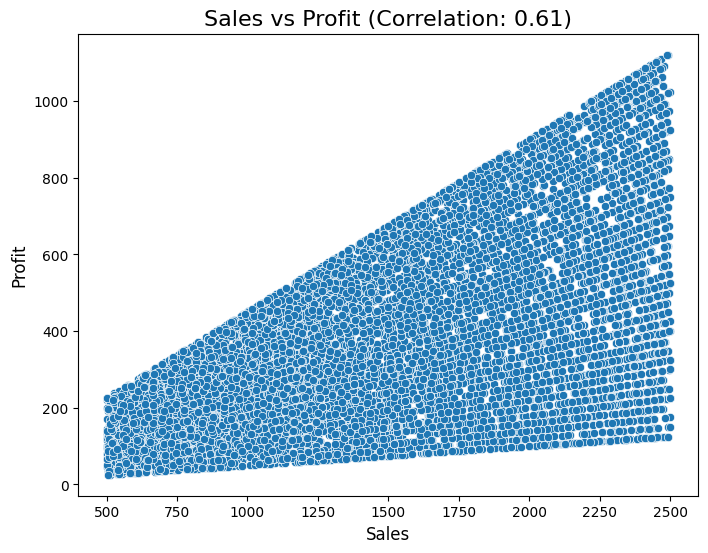

In [48]:
# Correlation between Sales och Profit
correlation = df['Sales'].corr(df['Profit'])

print(f"Correlation between Sales och Profit: {correlation}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sales', y='Profit', data=df)

plt.title(f'Sales vs Profit (Correlation: {correlation:.2f})', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Profit', fontsize=12)

plt.show()

Correlation between Discount och Profit: 1.7476233317140046e-05


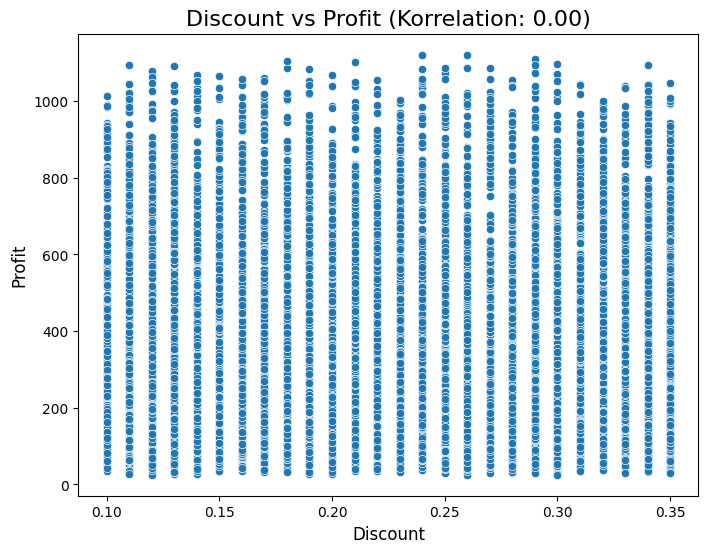

In [49]:
# Correlation between Discount och Profit

correlation = df['Discount'].corr(df['Profit'])

print(f"Correlation between Discount och Profit: {correlation}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount', y='Profit', data=df)

plt.title(f'Discount vs Profit (Korrelation: {correlation:.2f})', fontsize=16)
plt.xlabel('Discount', fontsize=12)
plt.ylabel('Profit', fontsize=12)

plt.show()

In [57]:
# Quantity of sold items per Region

sales_count_by_region = df.groupby('Region').size()

print("Quantity of made sales:\n", sales_count_by_region)

Quantity of made sales:
 Region
Central    2323
East       2848
North         1
South      1619
West       3203
dtype: int64


In [58]:
# Quantity of sales by Region and Category

sales_count_by_region_category = df.groupby(['Region', 'Category']).size()

print("Quantity of sales by Region and Category:\n", sales_count_by_region_category)

Quantity of sales by Region and Category:
 Region   Category         
Central  Bakery               309
         Beverages            343
         Eggs, Meat & Fish    331
         Food Grains          310
         Fruits & Veggies     355
         Oil & Masala         300
         Snacks               375
East     Bakery               392
         Beverages            385
         Eggs, Meat & Fish    449
         Food Grains          393
         Fruits & Veggies     384
         Oil & Masala         416
         Snacks               429
North    Oil & Masala           1
South    Bakery               240
         Beverages            227
         Eggs, Meat & Fish    233
         Food Grains          232
         Fruits & Veggies     234
         Oil & Masala         202
         Snacks               251
West     Bakery               472
         Beverages            445
         Eggs, Meat & Fish    477
         Food Grains          463
         Fruits & Veggies     445
         Oil

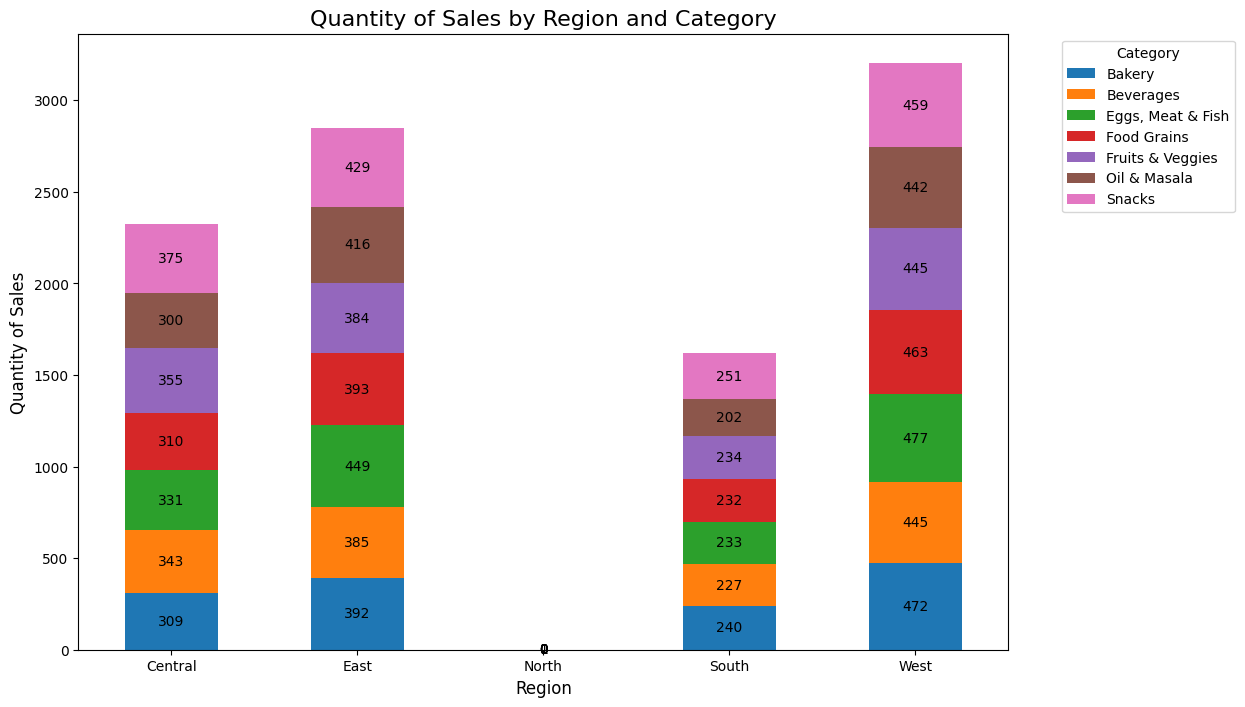

In [59]:
# Visualisation of Quantity of sales by Region and Category

sales_count_by_region_category = df.groupby(['Region', 'Category']).size().unstack(fill_value=0)

ax = sales_count_by_region_category.plot(kind='bar', stacked=True, figsize=(12, 8))

for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.title('Quantity of Sales by Region and Category', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Quantity of Sales', fontsize=12)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=0)
plt.show()

In [60]:
# Quantity of sales by Region and Sub Category

sales_count_by_region_sub_category = df.groupby(['Region', 'Sub Category']).size()
pd.set_option('display.max_rows', None)

print("Quantity of sales by Region and Sub Category:\n", sales_count_by_region_sub_category)

Quantity of sales by Region and Sub Category:
 Region   Sub Category      
Central  Atta & Flour           72
         Biscuits               89
         Breads & Buns         110
         Cakes                 110
         Chicken                87
         Chocolates            125
         Cookies               110
         Dals & Pulses          82
         Edible Oil & Ghee     123
         Eggs                   83
         Fish                   84
         Fresh Fruits           91
         Fresh Vegetables       98
         Health Drinks         168
         Masalas                78
         Mutton                 77
         Noodles               140
         Organic Fruits         77
         Organic Staples        84
         Organic Vegetables     89
         Rice                   72
         Soft Drinks           175
         Spices                 99
East     Atta & Flour           96
         Biscuits              130
         Breads & Buns         149
         Cakes 

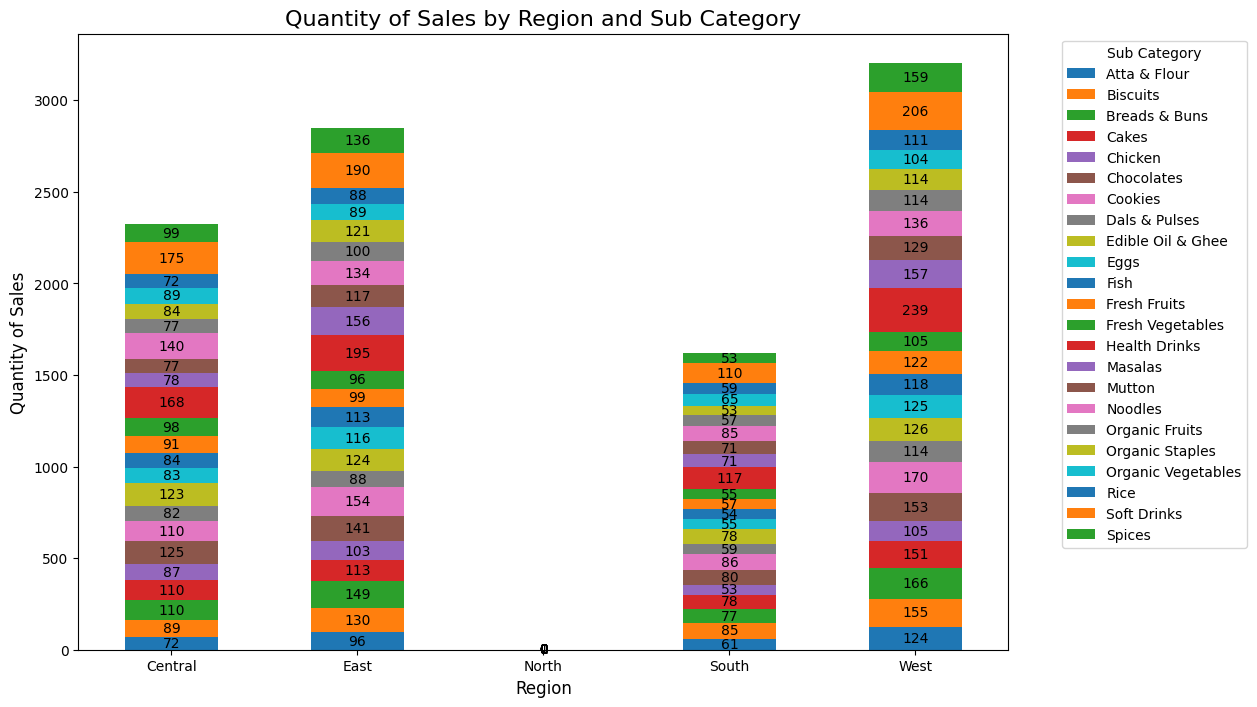

In [61]:
# Visualisation of Quantity of sales by Region and Sub Category

sales_count_by_region_sub_category = df.groupby(['Region', 'Sub Category']).size().unstack(fill_value=0)

ax = sales_count_by_region_sub_category.plot(kind='bar', stacked=True, figsize=(12, 8))

for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.title('Quantity of Sales by Region and Sub Category', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Quantity of Sales', fontsize=12)
plt.legend(title="Sub Category", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=0)
plt.show()

In [77]:
# Profit per Region

profit_per_region = df.groupby('Region')['Profit'].sum()

print("Profit per Region:\n", profit_per_region)

Profit per Region:
 Region
Central     856806.84
East       1074345.58
North          401.28
South       623562.89
West       1192004.61
Name: Profit, dtype: float64


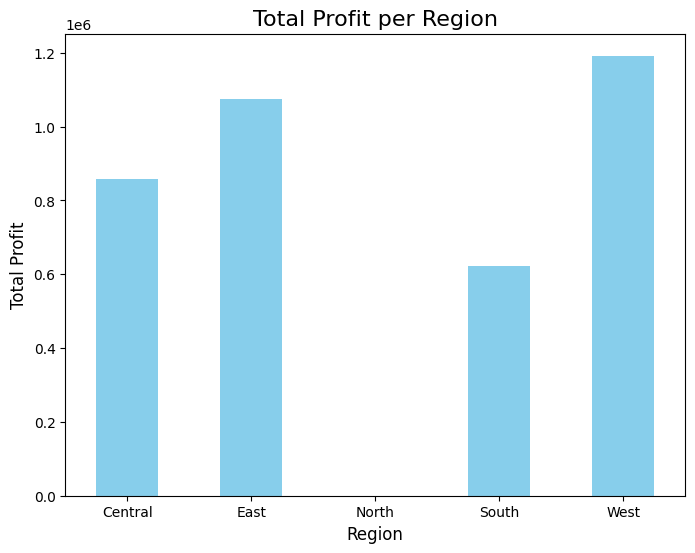

In [78]:
# Visualisation of Profit per Region

plt.figure(figsize=(8, 6))
profit_per_region.plot(kind='bar', color='skyblue')

# Lägg till titlar och etiketter
plt.title('Total Profit per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)

# Visa diagrammet
plt.xticks(rotation=0)
plt.show()

In [82]:
# Profit per Region and Category
profit_per_region_category = df.groupby(['Region', 'Category'])['Profit'].sum()

print("Profit per Region och Category:\n", profit_per_region_category)

Profit per Region och Category:
 Region   Category         
Central  Bakery               109543.91
         Beverages            128017.14
         Eggs, Meat & Fish    126587.35
         Food Grains          111517.05
         Fruits & Veggies     131699.53
         Oil & Masala         109261.91
         Snacks               140179.95
East     Bakery               153741.06
         Beverages            144498.17
         Eggs, Meat & Fish    164465.08
         Food Grains          154932.01
         Fruits & Veggies     141292.78
         Oil & Masala         155569.22
         Snacks               159847.26
North    Oil & Masala            401.28
South    Bakery                89102.07
         Beverages             84058.78
         Eggs, Meat & Fish     93728.18
         Food Grains           94823.55
         Fruits & Veggies      92961.26
         Oil & Masala          73909.18
         Snacks                94979.87
West     Bakery               176134.02
         Beverages  

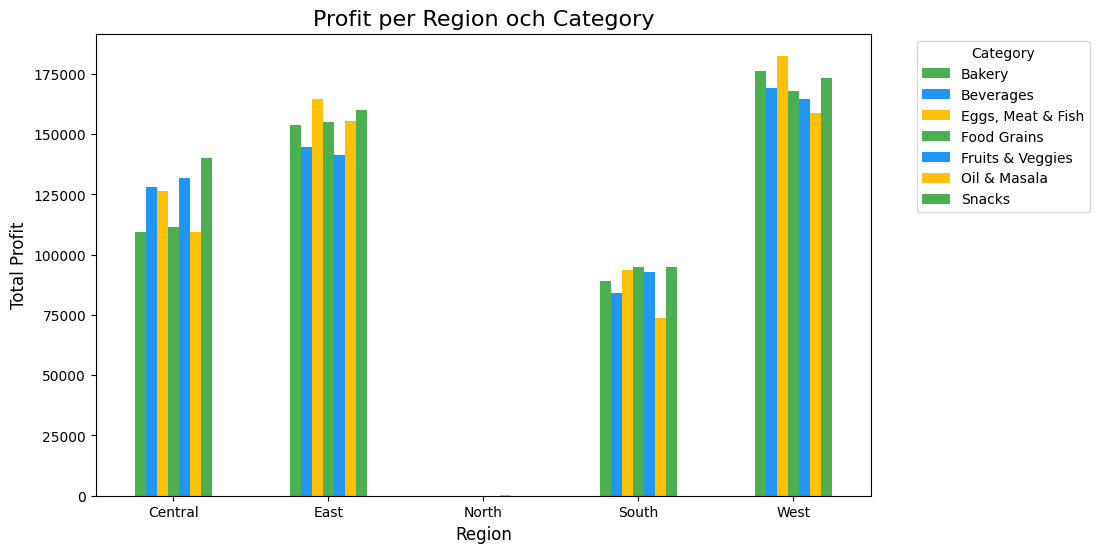

In [83]:
# Visualisation of Profit per Region and Category
profit_per_region_category_pivot = profit_per_region_category.unstack()

profit_per_region_category_pivot.plot(kind='bar', figsize=(10, 6), color=['#4CAF50', '#2196F3', '#FFC107'])

plt.title('Profit per Region och Category', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=0)
plt.show()